In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
from thesis_toolbox.utils import get_locations_CLP,read_depostion_datasets
from thesis_toolbox.plot.tools import add_letter
from thesis_toolbox.plot.plot_source_contribution import depositon_facet_plot
from dust.plot.plotting import mpl_base_map_plot_xr
from dust.plot.maps import map_terrain_china, map_china
from dust.plot.utils import _gen_flexpart_colormap,_add_colorbar
from matplotlib.colors import LogNorm
from thesis_toolbox.plot.tools import latex_plot
from matplotlib import rc
import matplotlib.cm as cm
import matplotlib
# latex_plot()

In [2]:
if 'snakemake' in globals():
    to_file = True
    path='./'
else:
    path = '../../../'
    to_file= False

In [3]:
locs = ['SHAPOTOU','BADOE','SACOL','LUOCHUAN','LANTIAN','LINGTAI']
drydep_2micron = read_depostion_datasets(path+'results/model_results/', locs, 'drydep','2micron')
drydep_2micron = drydep_2micron.mean(dim='year')


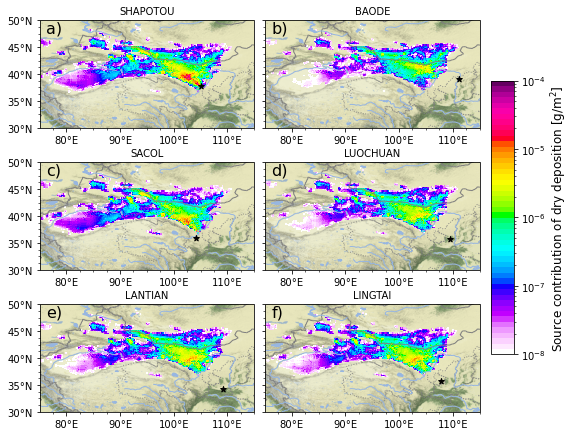

In [4]:
fig,ax = plt.subplots(nrows=3, ncols=2,  figsize=(8.3*0.95, 11.7*0.65), subplot_kw={'projection':ccrs.PlateCarree()})
depositon_facet_plot(drydep_2micron, vmin=1e-8,vmax=1e-4, 
                    add_labels=False, ax=ax
                    , hspace=0.1, wspace=0.05,  
                    fontsize_title=10, colorbar=False)
fig = plt.gcf()
cmap = _gen_flexpart_colormap()
cax = fig.add_axes([0.92, 0.25,0.04,0.5])
fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.LogNorm(1e-8,1e-4), cmap=cmap), cax=cax,
            label='Source contribution of dry deposition [$\mathrm{g/m}^2$]')
add_letter(ax,y=0.89)
if to_file:
    plt.savefig(snakemake.output.clay_plot,bbox_inches='tight')


In [5]:
locs = ['SHAPOTOU','BADOE','SACOL','LUOCHUAN','LANTIAN','LINGTAI']
drydep_20micron = read_depostion_datasets(path+'results/model_results/', locs, 'drydep','20micron')
drydep_20micron = drydep_20micron.mean(dim='year')

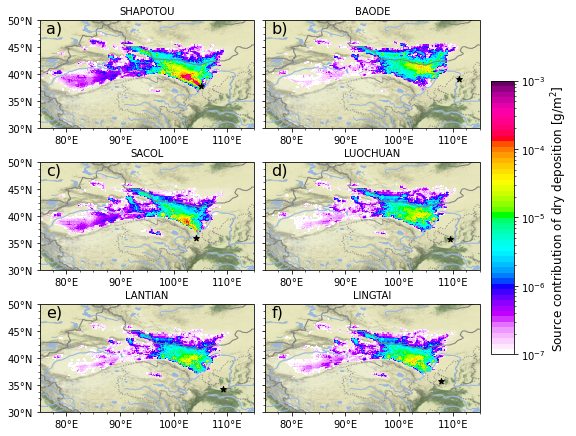

In [6]:
fig,ax = plt.subplots(nrows=3, ncols=2,  figsize=(8.3*0.95, 11.7*0.65), subplot_kw={'projection':ccrs.PlateCarree()})
depositon_facet_plot(drydep_20micron,
                     vmin=1e-7,vmax=1e-3, 
                    add_labels=False, ax=ax
                    , hspace=0.1, wspace=0.05,  
                    fontsize_title=10, colorbar=False)

fig = plt.gcf()
cmap = _gen_flexpart_colormap()
cax = fig.add_axes([0.92, 0.25,0.04,0.5])
fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.LogNorm(1e-7,1e-3), cmap=cmap), cax=cax,
            label='Source contribution of dry deposition [$\mathrm{g/m}^2$]')
add_letter(ax,y=0.89)
if to_file:
    plt.savefig(snakemake.output.silt_plot,bbox_inches='tight')